In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import math
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [466]:
credit_card_df= pd.read_csv('data/dataXX.csv')
credit_card_df

,Unnamed: 0,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,dmy_M,dmy_Y,dmy_Y.1,dmy_Pensioner,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
0,0,427500.0,33,12,2,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,427500.0,33,12,2,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,112500.0,59,3,2,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,270000.0,52,8,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,270000.0,52,8,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,22426,130500.0,44,26,2,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
22427,22427,315000.0,48,7,2,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
22428,22428,157500.0,34,4,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
22429,22429,157500.0,34,4,2,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [467]:
credit_card_df = credit_card_df.drop(columns=['Unnamed: 0'])

In [468]:
credit_card_df

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,dmy_M,dmy_Y,dmy_Y.1,dmy_Pensioner,dmy_State servant,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
0,427500.0,33,12,2,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,427500.0,33,12,2,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,112500.0,59,3,2,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,270000.0,52,8,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,270000.0,52,8,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,130500.0,44,26,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22427,315000.0,48,7,2,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
22428,157500.0,34,4,2,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
22429,157500.0,34,4,2,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [469]:
 print(credit_card_df. columns)

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'STATUS', 'dmy_M', 'dmy_Y', 'dmy_Y.1', 'dmy_Pensioner',
       'dmy_State servant', 'dmy_Student', 'dmy_Working',
       'dmy_High school degree', 'dmy_Higher education', 'dmy_Lower secondary',
       'dmy_Married', 'dmy_Separated', 'dmy_Single / not married', 'dmy_Widow',
       'dmy_House / apartment', 'dmy_Municipal apartment',
       'dmy_Office apartment', 'dmy_Rented apartment', 'dmy_With parents',
       'dmy_Cleaning staff', 'dmy_Cooking staff', 'dmy_Core staff',
       'dmy_Drivers', 'dmy_HR staff', 'dmy_High skill tech staff',
       'dmy_IT staff', 'dmy_Laborers', 'dmy_Low-skill Laborers',
       'dmy_Managers', 'dmy_Medicine staff', 'dmy_Other',
       'dmy_Private service staff', 'dmy_Realty agents', 'dmy_Sales staff',
       'dmy_Secretaries', 'dmy_Security staff', 'dmy_Waiters/barmen staff'],
      dtype='object')


In [470]:
credit_card_df = credit_card_df.drop(columns=['dmy_Y','dmy_Y.1','DAYS_BIRTH','dmy_House / apartment','dmy_Municipal apartment','dmy_Office apartment','dmy_Rented apartment','dmy_With parents'])

In [471]:
credit_card_df = credit_card_df.drop(columns=['dmy_Cleaning staff', 'dmy_Cooking staff', 'dmy_Core staff',
     'dmy_Drivers', 'dmy_HR staff', 'dmy_High skill tech staff',
       'dmy_IT staff', 'dmy_Laborers', 'dmy_Low-skill Laborers',
       'dmy_Managers', 'dmy_Medicine staff', 'dmy_Other',
       'dmy_Private service staff', 'dmy_Realty agents', 'dmy_Sales staff',
       'dmy_Secretaries', 'dmy_Security staff', 'dmy_Waiters/barmen staff'])

In [398]:
#credit_card_df = credit_card_df.drop(columns=['DAYS_BIRTH'])

In [472]:
y_col = 'STATUS'
y = credit_card_df[y_col]
x = credit_card_df[credit_card_df.columns.drop(y_col)]

In [473]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20,random_state=123)

In [474]:
x_train.shape

(17944, 15)

In [475]:
y_train.shape

(17944,)

In [476]:
x_test.shape

(4487, 15)

In [477]:
y_test.shape

(4487,)

In [478]:
std_scaler=StandardScaler().fit(x_train)

x_train_scaled=std_scaler.transform(x_train)

In [479]:
x_test_scaled=std_scaler.transform(x_test)

In [480]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[-0.97532523 -0.43820501 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 [-0.97532523 -0.41098998  0.88941201 ... -0.25430901 -0.37545674
  -0.20117941]
 [ 1.25359175 -0.42187599 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 ...
 [-0.75243353 -0.41915449 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 [-0.52954183  2.26152566 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 [-0.30665013 -0.44909102  0.88941201 ... -0.25430901 -0.37545674
  -0.20117941]]
--------
[[ 1.25359175 -0.45725553 -1.34582737 ...  3.93222397 -0.37545674
  -0.20117941]
 [-0.08375844 -0.44092651 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 [-0.30665013 -0.44092651 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 ...
 [ 0.80780835 -0.45997703  0.88941201 ... -0.25430901 -0.37545674
  -0.20117941]
 [-1.06448191 -0.40554697 -0.22820768 ... -0.25430901 -0.37545674
  -0.20117941]
 [ 0.36202496 -0.427319    2.0070317  ... -0.25430901 -0.37545674
  -0.20117941]]


,Error_metric,Train,Test
0,Accuracy,0.845575,0.851571
1,Precision,1.000000,1.000000
2,Recall,0.004670,0.004484


Confusion matrix for the train set
[[15160     0]
 [ 2771    13]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


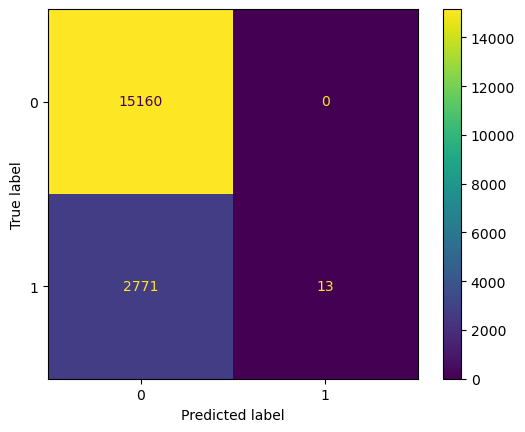



Confusion matrix for the test set
[[3818    0]
 [ 666    3]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


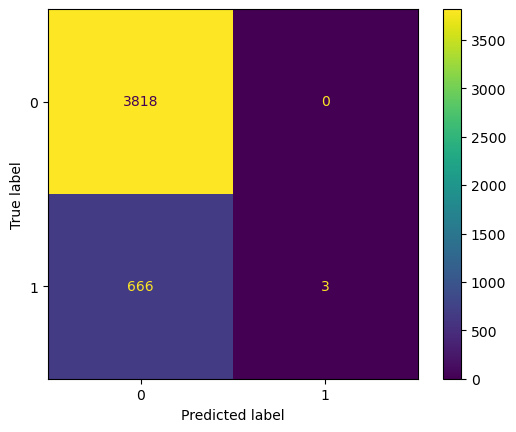

In [481]:
from sklearn.linear_model import LogisticRegression #Classification, regression is just a nme
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred_train_log = log_model.predict(x_train_scaled)
y_pred_test_log = log_model.predict(x_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,x_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,x_test_scaled,y_test, values_format = 'd')
plt.show()

In [482]:
log_model.predict_proba(x_test_scaled[:10, :])

array([[0.86656974, 0.13343026],
       [0.8605268 , 0.1394732 ],
       [0.84278123, 0.15721877],
       [0.83631074, 0.16368926],
       [0.8723275 , 0.1276725 ],
       [0.82714182, 0.17285818],
       [0.88361207, 0.11638793],
       [0.78124547, 0.21875453],
       [0.82601422, 0.17398578],
       [0.86223269, 0.13776731]])

In [483]:
Y_col = 'STATUS'
Y = credit_card_df[Y_col]
X = credit_card_df[credit_card_df.columns.drop(Y_col)]

In [484]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=.20,random_state=42)

In [485]:
X_train.shape

(17944, 15)

In [486]:
Y_train.shape

(17944,)

In [487]:
X_test.shape

(4487, 15)

In [488]:
Y_test.shape

(4487,)

In [489]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)

In [490]:
smote = SMOTE()
X_train_scaled, Y_train = smote.fit_resample(X_train_scaled, Y_train)

In [491]:
X_test_scaled=std_scaler.transform(X_test)

In [492]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.25490607 -0.43768263 -0.23168352 ... -0.24968158 -0.3766152
  -0.20012747]
 [-0.48315584 -0.40760191 -0.23168352 ... -0.24968158 -0.3766152
  -0.20012747]
 [-1.19620688  2.27778669 -0.23168352 ... -0.24968158 -0.3766152
  -0.20012747]
 ...
 [ 1.37246621 -0.44831938  0.88708102 ... -0.24968158 -0.3766152
  -0.20012747]
 [-0.08206463 -0.44315186 -1.35044806 ... -0.24968158 -0.3766152
   4.99681519]
 [-1.18632044 -0.4566227   3.09703383 ... -0.24968158 -0.3766152
  -0.20012747]]
--------
[[ 0.14076382 -0.45682491 -0.23168352 ... -0.24968158 -0.3766152
  -0.20012747]
 [ 0.80924917 -0.44315186 -0.23168352 ... -0.24968158 -0.3766152
  -0.20012747]
 [ 1.43316883  2.27778669 -1.35044806 ... -0.24968158  2.65523007
  -0.20012747]
 ...
 [ 0.80924917 -0.44862108 -1.35044806 ...  4.00510121 -0.3766152
  -0.20012747]
 [-0.57228722  2.27778669 -0.23168352 ... -0.24968158 -0.3766152
  -0.20012747]
 [ 0.36359227 -0.40486729  0.88708102 ... -0.24968158 -0.3766152
  -0.20012747]]


,Error_metric,Train,Test
0,Accuracy,0.536460,0.542902
1,Precision,0.537940,0.159239
2,Recall,0.516962,0.460870


Confusion matrix for the train set
[[8440 6741]
 [7333 7848]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


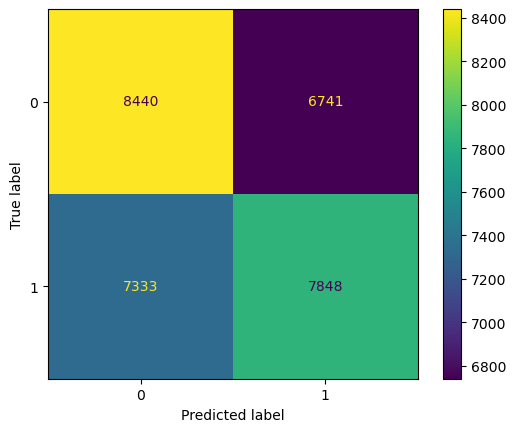



Confusion matrix for the test set
[[2118 1679]
 [ 372  318]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


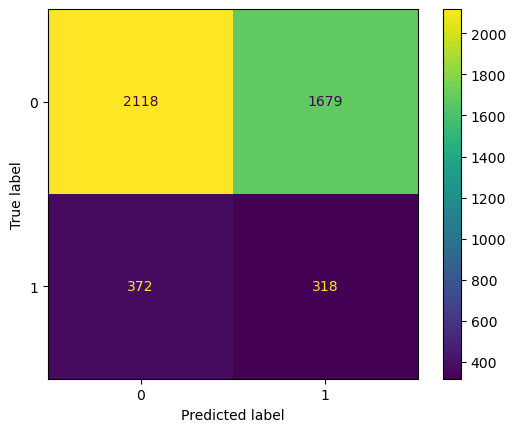

In [506]:
from sklearn.linear_model import LogisticRegression #Classification, regression is just a nme
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model_smt = LogisticRegression()
log_model_smt.fit(X_train_scaled, Y_train)

Y_pred_train_log = log_model.predict(X_train_scaled)
Y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(Y_train, Y_pred_train_log),
                                         precision_score(Y_train, Y_pred_train_log),
                                         recall_score(Y_train, Y_pred_train_log)],
                               'Test': [accuracy_score(Y_test, Y_pred_test_log),
                                        precision_score(Y_test, Y_pred_test_log),
                                        recall_score(Y_test, Y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(Y_train,Y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,Y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(Y_test, Y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,Y_test, values_format = 'd')
plt.show()

In [494]:
log_model.predict_proba(X_test_scaled[:10, :])

array([[0.47410575, 0.52589425],
       [0.49510936, 0.50489064],
       [0.48699051, 0.51300949],
       [0.55052522, 0.44947478],
       [0.4919827 , 0.5080173 ],
       [0.4366297 , 0.5633703 ],
       [0.53002188, 0.46997812],
       [0.57234525, 0.42765475],
       [0.46770751, 0.53229249],
       [0.50423423, 0.49576577]])

In [495]:
log_model.predict(X_test)


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 0, 1])

In [500]:
i_AMT_INCOME_TOTAL = int(input("Income: "))
i_DAYS_EMPLOYED = int(input("Years of employment: "))
i_CNT_FAM_MEMBERS = int(input("Family memebers: "))
i_dmy_M = float(input("Gender(Male 1, Female: 0): "))
i_dmy_Pensioner = int(input("Pensioner (Yes: 1, No: 0): "))
i_dmy_State_servant = int(input("State servant (Yes: 1, No: 0): "))
i_dmy_Student = int(input("Student (Yes: 1, No: 0): "))
i_dmy_Working = float(input("Working (Yes: 1, No: 0): "))
i_dmy_High_school_degree = int(input("High school degree (Yes: 1, No: 0): "))
i_dmy_Higher_education = int(input("Higher education (Yes: 1, No: 0): "))
i_dmy_Lower_secondary = int(input("Lower secondary (Yes: 1, No: 0): "))
i_dmy_Married = int(input("Married (Yes: 1, No: 0): "))
i_dmy_Separated = int(input("Separated (Yes: 1, No: 0): "))
i_dmy_Single = int(input("Single (Yes: 1, No: 0): "))
i_dmy_Widow = int(input("Widow (Yes: 1, No: 0): "))


Income: 12345
Years of employment: 4
Family memebers: 4
Gender(Male 1, Female: 0): 1
Pensioner (Yes: 1, No: 0): 1
State_servant (Yes: 1, No: 0): 0
Student (Yes: 1, No: 0): 0
Working (Yes: 1, No: 0): 0
High school degree (Yes: 1, No: 0): 1
Higher education (Yes: 1, No: 0): 0
Lower secondary (Yes: 1, No: 0): 0
Married (Yes: 1, No: 0): 1
Separated (Yes: 1, No: 0): 0
Single (Yes: 1, No: 0): 0
Widow (Yes: 1, No: 0): 0


In [501]:
new_data = pd.DataFrame(columns=["i_AMT_INCOME_TOTAL", "i_DAYS_EMPLOYED", "i_CNT_FAM_MEMBERS", "i_dmy_M", "i_dmy_Pensioner", "i_dmy_State_servant",
                                  "i_dmy_Student", "i_dmy_Working", "i_dmy_High_school_degree", "i_dmy_Higher_education", "i_dmy_Lower_secondary","i_dmy_Married","i_dmy_Separated","i_dmy_Single","i_dmy_Widow"])

In [502]:
new_data.loc[0] = pd.Series({"i_AMT_INCOME_TOTAL":i_AMT_INCOME_TOTAL, "i_DAYS_EMPLOYED":i_DAYS_EMPLOYED, "i_CNT_FAM_MEMBERS":i_CNT_FAM_MEMBERS, "i_dmy_M":i_dmy_M,
                             "i_dmy_Pensioner":i_dmy_Pensioner, "i_dmy_State_servant":i_dmy_State_servant, "i_dmy_Student":i_dmy_Student,
                             "i_dmy_Working":i_dmy_Working,"i_dmy_High_school_degree":i_dmy_High_school_degree, "i_dmy_Higher_education":i_dmy_Higher_education, "i_dmy_Lower_secondary":i_dmy_Lower_secondary, "i_dmy_Married":i_dmy_Married, "i_dmy_Separated":i_dmy_Separated, "i_dmy_Single":i_dmy_Single, "i_dmy_Widow":i_dmy_Widow})

In [503]:
new_data = std_scaler.transform(new_data)
new_data

/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- i_AMT_INCOME_TOTAL
- i_CNT_FAM_MEMBERS
- i_DAYS_EMPLOYED
- i_dmy_High_school_degree
- i_dmy_Higher_education
- ...
Feature names seen at fit time, yet now missing:
- AMT_INCOME_TOTAL
- CNT_FAM_MEMBERS
- DAYS_EMPLOYED
- dmy_High school degree
- dmy_Higher education
- ...

  warnings.warn(message, FutureWarning)


array([[-1.74243369, -0.44862108,  2.00584556,  1.40404874,  2.27202287,
        -0.3084607 , -0.02361356, -1.03182586,  0.63843038, -0.61901571,
        -0.10829386,  0.65072971, -0.24968158, -0.3766152 , -0.20012747]])

In [504]:
new_data

array([[-1.74243369, -0.44862108,  2.00584556,  1.40404874,  2.27202287,
        -0.3084607 , -0.02361356, -1.03182586,  0.63843038, -0.61901571,
        -0.10829386,  0.65072971, -0.24968158, -0.3766152 , -0.20012747]])

In [507]:
log_model_smt.predict_proba(new_data)

array([[0.00227325, 0.99772675]])

In [509]:
log_model_smt.predict(new_data)

array([1])